In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [36]:
import sys
sys.path.append("../../../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Database Design'
data = make_dir_line(modality, project)

raw = data('raw')
processed = data('processed')

In [37]:
import sqlite3

conn = sqlite3.connect(":memory:")  ## aca se indica el nombre de la db.

conn = sqlite3.connect(processed / 'books.db')
cur = conn.cursor()

# 7.2.0_Database Schemas and Normalization

## 7.2.2 Running from star to snowflake

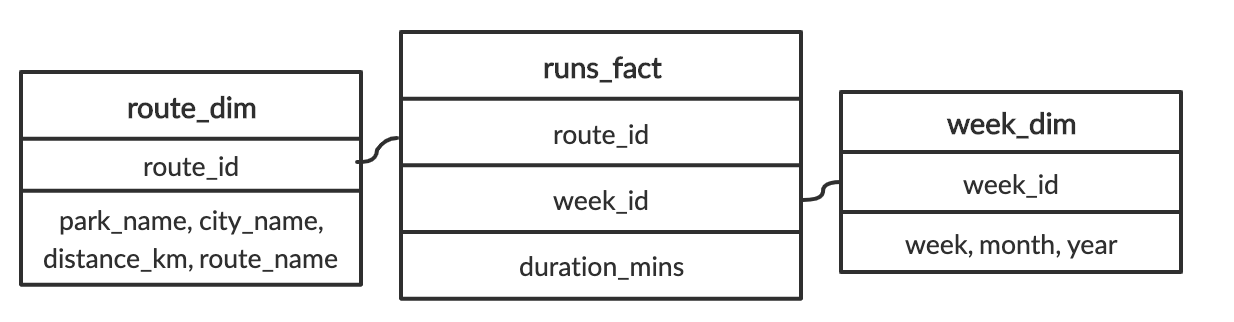

After learning about the snowflake schema, you convert the current star schema into a snowflake schema. To do this, you normalize route_dim and week_dim. Which option best describes the resulting new tables after doing this?

The tables runs_fact, route_dim, and week_dim have been loaded.

R:/ Week_dim is extended two dimensions with new tables for month and year. route_dim is extended two dimensions with new tables for city and park. month, year, city, and park are indeed repeated often. year and city would extend month and park, respectively.

## 7.2.3 Adding foreign keys

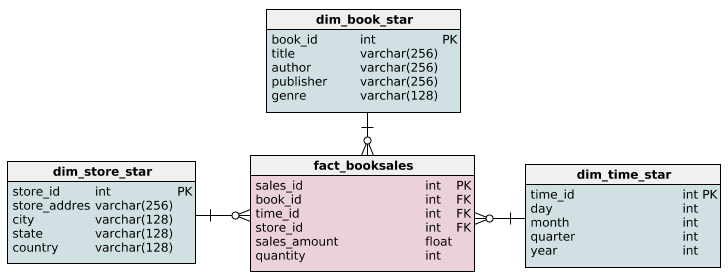

In [38]:
# # -- Add the book_id foreign key, Add the time_id foreign key, Add the store_id foreign key
# cur.execute("""
            
#             ALTER TABLE fact_booksales ADD CONSTRAINT sales_book
#                 FOREIGN KEY (book_id) REFERENCES dim_book_star (book_id);
                
#             ALTER TABLE fact_booksales ADD CONSTRAINT sales_time
#             FOREIGN KEY (time_id) REFERENCES dim_time_star (time_id);

#             ALTER TABLE fact_booksales ADD CONSTRAINT sales_store
#             FOREIGN KEY (store_id) REFERENCES dim_store_star (store_id);

#             """).fetchall()

## 7.2.4 Extending the book dimension

In [39]:
cur.execute("""
            
            DROP TABLE IF EXISTS dim_author;         

            """).fetchall()

OperationalError: database is locked

In [ ]:
# -- Create dim_author with an author column
cur.execute("""
            
            CREATE TABLE dim_author (
                author varchar(256)  NOT NULL
            );         

            """).fetchall()

[]

In [ ]:
# -- Insert authors into the new table
cur.execute("""
            
            INSERT INTO dim_author
            SELECT DISTINCT author FROM dim_book_star;   

            """).fetchall()

[]

In [ ]:
# # -- Add a primary key 
# cur.execute("""
            
#             ALTER TABLE dim_author
#             ADD COLUMN author_id SERIAL PRIMARY KEY; 

#             """).fetchall()

In [ ]:
# -- Output the new table
cur.execute("""
            
            SELECT * 
            FROM dim_author;

            """).fetchall()

[('Montreal',),
 ('Quebec City',),
 ('Toronto',),
 ('Ottawa',),
 ('Vancouver',),
 ('Victoria',),
 ('Syracuse',),
 ('Montclair',),
 ('Hoboken',),
 ('Burlington',),
 ('San Francisco',),
 ('Los Angeles',),
 ('Seattle',),
 ('Portland',),
 ('Rochester',),
 ('Boston',),
 ('Waltham',),
 ('Detroit',),
 ('Miami',),
 ('Fort Lauderdale',),
 ('Houston',),
 ('New Orleans',),
 ('Salt Lake City',),
 ('Agatha Christie',),
 ('Aldous Huxley',),
 ('Alice Walker',),
 ('Alice Waters',),
 ('Barack Obama',),
 ('Beverly Cleary',),
 ('Cecily von Ziegesar',),
 ('Dan Brown',),
 ('David Foster Wallace',),
 ('F. Scott Fitzgerald',),
 ('George R.R. Martin',),
 ('H.G. Wells',),
 ('Isaac Asimov',),
 ('James Patterson',),
 ('Stephenie Meyer',),
 ('Octavia E. Butler',),
 ('Steven D. Levitt',),
 ('J.R.R. Tolkien',)]

## 7.2.5 Querying the star schema

In [ ]:
# -- Output each state and their total sales_amount, Join to get book information, Get all books with in the novel genre, Group results by state
cur.execute("""
            
            SELECT dim_store_star.state, SUM(sales_amount)
            FROM fact_booksales
                JOIN dim_book_star on fact_booksales.book_id = dim_book_star.book_id
                JOIN dim_store_star on fact_booksales.store_id = dim_store_star.store_id
            WHERE  
                dim_book_star.genre = 'novel'
            GROUP BY
                dim_store_star.state;

            """).fetchall()

[('British Columbia', 374629.19999999984),
 ('California', 583248.6),
 ('Florida', 295594.20000000007),
 ('Louisiana', 176979.00000000003),
 ('Massachusetts', 344671.80000000005),
 ('Michigan', 82011.59999999998),
 ('New Jersey', 272956.2),
 ('New York', 248529.60000000012),
 ('Ontario', 402263.39999999997),
 ('Quebec', 372134.39999999997),
 ('Texas', 317730.59999999986),
 ('Utah', 128812.20000000001),
 ('Vermont', 216282.0),
 ('Washington', 272177.4000000001)]

## 7.2.6 Querying the snowflake schema

In [ ]:
# -- Output each state and their total sales_amount, Joins for the genre, Joins for the state, Get all books with in the novel genre and group the results by state
cur.execute("""
            
            SELECT dim_state_sf.state, sum(sales_amount)
            FROM fact_booksales
                JOIN dim_book_sf on fact_booksales.book_id = dim_book_sf.book_id
                JOIN dim_genre_sf on dim_book_sf.genre_id = dim_genre_sf.genre_id
                JOIN dim_store_sf on fact_booksales.store_id = dim_store_sf.store_id 
                JOIN dim_city_sf on dim_store_sf.city_id = dim_city_sf.city_id
                JOIN dim_state_sf on  dim_city_sf.state_id = dim_state_sf.state_id
            WHERE  
                dim_genre_sf.genre = 'novel'
            GROUP BY
            dim_state_sf.state;

            """).fetchall()

[('British Columbia', 374629.19999999984),
 ('California', 583248.6),
 ('Florida', 295594.20000000007),
 ('Louisiana', 176979.00000000003),
 ('Massachusetts', 344671.80000000005),
 ('Michigan', 82011.59999999998),
 ('New Jersey', 272956.2),
 ('New York', 248529.60000000012),
 ('Ontario', 402263.39999999997),
 ('Quebec', 372134.39999999997),
 ('Texas', 317730.59999999986),
 ('Utah', 128812.20000000001),
 ('Vermont', 216282.0),
 ('Washington', 272177.4000000001)]

## 7.2.7 Updating countries

In [ ]:
# -- Output records that need to be updated in the star schema
cur.execute("""
            
            SELECT * 
            FROM dim_store_star
            WHERE country != 'USA' AND state !='CA';

            """).fetchall()

[(798, '23 Jeanne Ave', 'Montreal', 'Quebec', 'Canada'),
 (799, '56 University St', 'Quebec City', 'Quebec', 'Canada'),
 (800, '23 Verte Ave', 'Montreal', 'Quebec', 'Canada'),
 (801, '33 Smith St', 'Toronto', 'Ontario', 'Canada'),
 (802, '44 Green Blvd', 'Toronto', 'Ontario', 'Canada'),
 (803, '55 Hover Lane', 'Ottawa', 'Ontario', 'Canada'),
 (804, '68 Washington St', 'Vancouver', 'British Columbia', 'Canada'),
 (805, '52 Kite St', 'Victoria', 'British Columbia', 'Canada'),
 (806, '912 Main St', 'Vancouver', 'British Columbia', 'Canada'),
 (807, '67 First Ave', 'Syracuse', 'New York', 'US'),
 (810, '345 Camp Road', 'Burlington', 'Vermont', 'United States of America'),
 (813,
  '908 Fulton St',
  'San Francisco',
  'California',
  'United States of America'),
 (818, '534 Main St', 'Portland', 'Washington', 'US'),
 (819, '89 Second Ave', 'Rochester', 'New York', 'United States'),
 (822,
  '22 Circle Lane',
  'Waltham',
  'Massachusetts',
  'United States of America'),
 (825, '3492 Jay St

In [ ]:
# -- Output records that need to be updated in the star schema
cur.execute("""
            
            SELECT COUNT(*) 
            FROM dim_store_star
            WHERE country != 'USA' AND state !='CA';

            """).fetchall()

[(18,)]

Question:

How many records would need to be updated in the snowflake schema?
 
R:/ 1 records. Only one record needs to be changed - Canada to CA. Updating is typically simpler in a snowflake schema because there are less records to update because redundant values are minimized to their own table (e.g., countries have their own table, dim_country_sf). Snowflake schemas are also better at enforcing naming conventions due to referential integrity. Note how there weren't any variations in how Canada and USA were referred to in the snowflake schema.


## 7.2.8 Extending the snowflake schema

In [ ]:
# -- Add a continent_id column with default value of 1
cur.execute("""
                        
            ALTER TABLE dim_country_sf
            ADD continent_id int NOT NULL DEFAULT(1);

            """).fetchall()

[]

In [ ]:
# # -- Add the foreign key constraint
# cur.execute("""
                                    
#             ALTER TABLE dim_country_sf 
#             ADD CONSTRAINT country_continent
#             FOREIGN KEY (continent_id) REFERENCES dim_continent_sf(continent_id);

#             """).fetchall()

In [ ]:
# -- Output updated table
cur.execute("""
                        
            SELECT * 
            FROM dim_country_sf;

            """).fetchall()

[(1, 'Canada', 1), (2, 'USA', 1)]

## 7.2.10 Converting to 1NF

In [ ]:
conn = sqlite3.connect(":memory:")  ## aca se indica el nombre de la db.
cur = conn.cursor()

In [ ]:
customer = pd.read_csv(raw / 'customer.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
customer

,customer_id,customer_name,cars_rented,invoice_id,premium_member,salutation
0,1453,Kelly Brennan,4KL298,4534,False,Dr
1,1454,Tom Nguyen,5PL4YY,9832,False,Mr
2,1455,Georgia Kim,"5H9OP5, 9PH8GF, 499ERW","2903, 3490, 1021",True,Ms
3,1456,Jean Ford,"4KL298, 9PH8GF","7890, 4494",True,Mrs


Question:

Does the customers table meet 1NF criteria?

R:/ No, because there are multiple values in cars_rented and invoice_id

In [ ]:
conn.executescript(
            """

            DROP TABLE IF EXISTS customer;
                        
            CREATE TABLE customer (
                customer_id           INT NOT NULL,
                customer_name         VARCHAR,
                cars_rented           VARCHAR,
                invoice_id            VARCHAR,
                premium_member        VARCHAR,
                salutation            VARCHAR
            ); 
            
            """
)
conn.commit()

In [ ]:
df = pd.read_csv(raw / 'customer.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
customer = list(zip(df.customer_id, df.customer_name, df.cars_rented, df.invoice_id, df.premium_member, df.salutation))
cur.executemany("INSERT INTO customer VALUES  (?,?,?,?,?,?)", customer)

In [ ]:
# -- Create a new table to hold the cars rented by customers
# -- Drop a column from customers table to satisfy 1NF
conn.executescript( 
            """
    
            DROP TABLE IF EXISTS cust_rentals;

            CREATE TABLE cust_rentals (
                customer_id     INT NOT NULL,
                car_id          VARCHAR(128) NULL,
                invoice_id      VARCHAR(128) NULL
            );

            """
)
conn.commit()

In [40]:
# cur.execute("""
                        
#             ALTER TABLE customers
#             DROP COLUMN cars_rented,
#             DROP COLUMN invoice_id

#             """).fetchall()

In [20]:
print('Ok_')

Ok_
